In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#Import Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load the Dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#Describe the Dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
#For more Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [11]:
#Check Columns
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
df.shape

(244, 7)

In [14]:
#Check Unique Values
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [22]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [21]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [20]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [19]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [28]:
# Check null values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [30]:
#Null Values Percentage
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

<Axes: >

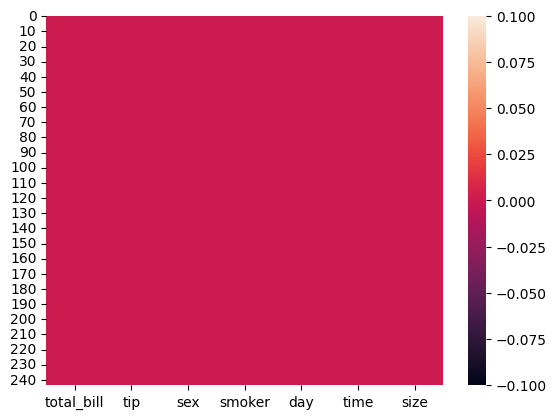

In [34]:
sns.heatmap(df.isnull(),cbar=True)
#This dataset has no null values. So, we don't need any replacement or imputations.

In [40]:
#Check Value Counts
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [38]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [39]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [42]:
# separate the features X and the target/labels y
X = df[['total_bill']]
y = df['tip']

In [43]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [44]:
# call the model
model = LinearRegression()

In [45]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [50]:
model.predict([[5000]])

c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([533.79288678])

In [51]:
# prediction
y_pred = model.predict(X_test)

In [52]:
# evaluation the model
from sklearn.metrics import mean_squared_error, r2_score
print('MSE: ', mean_squared_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  1.177312598767166
R2:  0.22486598935307833


In [54]:
# save the model
import pickle
filename = 'Machine_Learning_Basic.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
